In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load
import pickle

## First, lets load Cpx data

In [2]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
MSH_Cpx=All_Cpx.loc[All_Cpx['Volcano']=="MSH"]
MSH_Cpx['Sample_ID_Cpx']="MSH"

C:\Users\penny\AppData\Local\Temp\ipykernel_41264\1471596190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSH_Cpx['Sample_ID_Cpx']="MSH"


In [3]:
WangCopy=MSH_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
WangCopy['Model']="Wang"
JorgensonCopy=MSH_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)

## Choose Crustal density

In [4]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


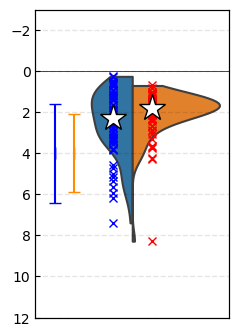

In [19]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2.5,4), sharey=True)
ax2 = ax1.twinx()
# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['MSH', 'MSH', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. MSH', 'MSH', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=["MSH"]
sns.violinplot(x="Sample_ID_Cpx", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")],  
         'xb')

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")],  
         'xr')

ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.9+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")],  
         'xb')

ax1.plot(1.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")],  
         'xr')

ax1.plot(0.9,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")]),  
         '*k', mfc='w', ms=20)

ax1.plot(1.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
ax1.set_xticks([])
ax1.errorbar(-0.4, 4, xerr=0, yerr=2.4,  ecolor='blue', elinewidth=1.5, fmt='none', capsize=4, mec='k')
ax1.errorbar(-0.3, 4, xerr=0, yerr=1.9,  ecolor='darkorange', elinewidth=1.5, fmt='none', capsize=4, mec='k')

fig.savefig('MSH_Cpx.png', dpi=200)

In [6]:
np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")])

2.2787508199987627

In [7]:
np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="MSH")])

1.7981791044776119

## Amphibole

C:\Users\penny\AppData\Local\Temp\ipykernel_41264\3413020915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSH_Amp['Sample_ID_Amp']="MSH"
C:\Users\penny\AppData\Local\Temp\ipykernel_41264\3413020915.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSH_Amp_Filt['Sample_ID_Amp']="MSH"
C:\Users\penny\AppData\Local\Temp\ipykernel_41264\3413020915.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

508
495


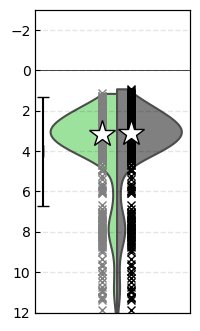

In [23]:

with open(r'../Combo_Amp.pkl', 'rb') as f:
            All_Amp=load(f)
MSH_Amp=All_Amp.loc[All_Amp['Volcano']=="MSH"]
MSH_Amp['Sample_ID_Amp']="MSH"

with open(r'../Combo_Amp_Filt.pkl', 'rb') as f:
            All_Amp_Filt=load(f)
MSH_Amp_Filt=All_Amp_Filt.loc[All_Amp_Filt['Volcano']=="MSH"]
MSH_Amp_Filt['Sample_ID_Amp']="MSH"
MSH_Amp['Class']='Unfilt'
MSH_Amp_Filt['Class']='filt'

Combo_Amp=pd.concat([MSH_Amp_Filt, MSH_Amp], axis=0)

print(sum(MSH_Amp['P_kbar_calc']>-10))
print(sum(MSH_Amp_Filt['P_kbar_calc']>-10))

import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,3.93), sharey=True)
ax2 = ax1.twinx()


# ax = sns.violinplot(y=MSH_Amp['P_Ridolfi21'],
#                 inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)
sns.violinplot(x="Volcano", y="P_Ridolfi21",  cut=0,  inner=None, hue="Class",
            data=Combo_Amp, split=True, ax=ax1, width=0.9,  palette=['lightgreen', 'grey'],
               stick=True)


ax1.plot(-0.1+0*MSH_Amp_Filt['P_Ridolfi21'],
  MSH_Amp_Filt['P_Ridolfi21'],
         'x', mec='grey')
ax1.plot(+0.1+0*MSH_Amp['P_Ridolfi21'],
  MSH_Amp['P_Ridolfi21'],
         'x', mec='black')

ax1.plot(-0.1,
  np.nanmedian(MSH_Amp_Filt['P_Ridolfi21']),
         '*k', mfc='w', ms=20)

ax1.plot(+0.1,
  np.nanmedian(MSH_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)
ax1.get_legend().remove()
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.55, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax1.errorbar(-0.5, 4, xerr=0, yerr=2.7,  ecolor='black', elinewidth=1.5, ms=0, capsize=4, mec='k')


fig.savefig('MSH_Amp.png', dpi=200)

In [9]:
np.nanmedian(MSH_Amp_Filt['P_Ridolfi21'])

3.169985331710294

In [10]:
np.nanmedian(MSH_Amp['P_Ridolfi21'])

3.1116699929024607

In [11]:
sum(MSH_Amp['P_kbar_calc']>-10)

508

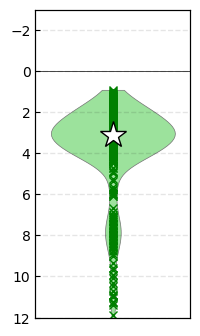

In [12]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()


ax = sns.violinplot(y=MSH_Amp['P_Ridolfi21'],
                inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)


ax1.plot(0*MSH_Amp['P_Ridolfi21'],
  MSH_Amp['P_Ridolfi21'],
         'x', mec='green')

ax1.plot(0,
  np.nanmedian(MSH_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)
# ax1.plot(0,
#   np.nanmean(MSH_Amp['P_Ridolfi21']),
#          'pk', mfc='w', ms=5)
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('MSH_Amp.png', dpi=200)

## Load in LP data

In [13]:
LPs=pd.read_excel(r'../../All_data_Merged.xlsx',
                  sheet_name="LP_Compilation")
LPs_MSH=LPs.loc[LPs['Volcano']=="MSH"]
LPs_MSH.head()

,Volcano,Latitude,Depth,Depth definition,Reference,Unnamed: 5,Unnamed: 6
80,MSH,46.1914,27.266949,Sea level,Nichols et al. 2011 extracted using web plot d...,NaN,NaN
81,MSH,46.1914,30.127119,Sea level,Nichols et al. 2011 extracted using web plot d...,NaN,NaN
82,MSH,46.1914,23.008475,Sea level,Nichols et al. 2011 extracted using web plot d...,NaN,NaN
83,MSH,46.1914,23.707627,Sea level,Nichols et al. 2011 extracted using web plot d...,NaN,NaN
84,MSH,46.1914,26.822034,Sea level,Nichols et al. 2011 extracted using web plot d...,NaN,NaN


In [14]:
LPs['Volcano'].unique()


array(['Lassen', 'Medicine Lake', 'Three sisters', 'Crater Lake',
       'Mount Baker', 'Glacier Peak', 'Mount Rainier', 'MSH'],
      dtype=object)

In [15]:
LPs['Volcano'].unique()

array(['Lassen', 'Medicine Lake', 'Three sisters', 'Crater Lake',
       'Mount Baker', 'Glacier Peak', 'Mount Rainier', 'MSH'],
      dtype=object)

## Raw template for geophysics and Exp Pet

## Expet plot

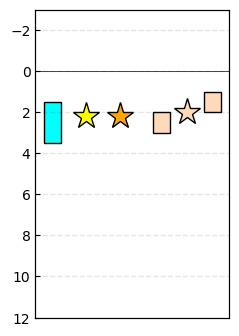

In [16]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2.5,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches
elev=2.549

# Rutherford et al. (1985)
ax1.plot(-0.2, 2.2, '*k', mfc='yellow', ms=20)
# Rutherford and Devine (1988)
ax1.plot(0.2, 2.2, '*k', mfc='orange', ms=20)
# Rutherford and Devine (2008) Amp cores
rect_RD2008 = patches.Rectangle((0.6,2),0.2,1,linewidth=1,
                            edgecolor='k',facecolor='peachpuff')
ax1.add_patch(rect_RD2008)
# Plag forming
ax1.plot(1, 2, '*k', mfc='peachpuff', ms=20)
# Amp rims

rect_RD20082 = patches.Rectangle((1.2,1),0.2,1,linewidth=1,
                            edgecolor='k',facecolor='peachpuff')
ax1.add_patch(rect_RD20082)
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)


# Gardner et al. 1995

rect_G1995 = patches.Rectangle((-0.7,1.5),0.2,2,linewidth=1,
                            edgecolor='k',facecolor='cyan')
ax1.add_patch(rect_G1995)


ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([-0.8, 1.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])                 
fig.savefig('Expet_MSH.png', dpi=200, bbox_inches="tight")

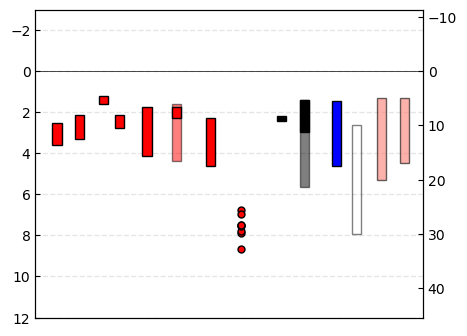

In [17]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches
elev=2.549 # Elevation of MSH in Km
mean_elev=elev-1.300 # Mean station elevation

sep=0.5
### SEISMIC CONSTRAINTS
# Barker and Malone, 7-11 km bsl Aseismic Zone
rect_BM1991 = patches.Rectangle((0.5-2.25*sep,7+elev),0.2, 11-7,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_BM1991)

# Musumeci et al. (2002) bsl Aseismic Zone
rect_M2002 = patches.Rectangle((0.5-1.25*sep,5.5+elev),0.2, 10-5.5,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_M2002)

# Waite and Moran, 2008 -  2-3.5 km - Low Velocity Zone
rect_WM2008 = patches.Rectangle((0.5-0.1,2+elev),0.2, 3.5-2,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_WM2008)

# Low evlocities at 5.5-8 k msl. 
rect_WM20082 = patches.Rectangle((0.5+0.5*sep,5.5+elev),0.2, 8-5.5,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_WM20082)

# Kiser et al. 2016 -High VP-VS region 4-13 km bsl  
rect_K2016 = patches.Rectangle((0.5+1.7*sep,4+elev),0.2,13-4,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_K2016)

#  Kiser et al. 2018 - 3.5 to 14 km bsl. 
rect_K2018 = patches.Rectangle((0.5+3*sep,3.5+elev),0.2,14-3.5,linewidth=1,
                            edgecolor='k',facecolor='red', alpha=0.5)
ax2.add_patch(rect_K2018)
# Highest melt fractions
rect_K2018H = patches.Rectangle((0.5+3*sep,4+elev),0.2,6-4,linewidth=1,
                            edgecolor='k',facecolor='red', alpha=1)
ax2.add_patch(rect_K2018H)

# Ulberg et al. (2020) - 
rect_U2020 = patches.Rectangle((0.5+4.5*sep,6+elev),0.2,15-6,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_U2020)

ax2.plot(0.5+6*sep+0*LPs_MSH['Depth'], LPs_MSH['Depth']+elev, 'ok', mfc='red', ms=5)




################################### GEODETIC EVIDENCE
Geodetic_offset=6*sep+0.3
# Lisowski et al. GPS best fit, says 7.9 km from mean height of the volcano

rect_L = patches.Rectangle((0.5+Geodetic_offset+sep,7+mean_elev),0.2,8-7,linewidth=1,
                            edgecolor='k',facecolor='black')
ax2.add_patch(rect_L)



# Mastin et al. - top is at 5+-1 km, bottom is 10-20 km 
rect_M = patches.Rectangle((0.5+Geodetic_offset+2*sep,4+mean_elev),0.2,10-4,linewidth=1,
                            edgecolor='k',facecolor='black', alpha=1)
ax2.add_patch(rect_M)

rect_M2 = patches.Rectangle((0.5+Geodetic_offset+2*sep,4+mean_elev),0.2,20-4,linewidth=1,
                            edgecolor='k',facecolor='black', alpha=0.5)
ax2.add_patch(rect_M2)

## Magnetotelluric data 
# Hill et al. (2009)
rect_H1 = patches.Rectangle((0.5+Geodetic_offset+0.2+3*sep,3+elev),0.2,15-3,linewidth=1,
                            edgecolor='k',facecolor='blue', alpha=1)
ax2.add_patch(rect_H1)
# rect_H2 = patches.Rectangle((0.5+11.5*sep,15+elev),0.2,25-15,linewidth=1,
#                             edgecolor='k',facecolor='blue', alpha=0.5)
# ax2.add_patch(rect_H2)
rect_Reg = patches.Rectangle((0.5+Geodetic_offset+0.1+3.5*sep+0.3,10),0.2,30-10,linewidth=1,
                             edgecolor='k',facecolor='None', alpha=0.5)
ax2.add_patch(rect_Reg)

ax1.plot([-1, 9], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

## Other constaints - Anders and Wang
O_off=0.5+Geodetic_offset+4*sep+0.2
# Anderson 
rect_A1 = patches.Rectangle((0.5+O_off,5),0.2,20.5-5.5,linewidth=1,
                            edgecolor='k',facecolor='salmon', alpha=0.6)
ax2.add_patch(rect_A1)

rect_W1 = patches.Rectangle((0.5+O_off+sep,5),0.2,17-5,linewidth=1,
                            edgecolor='k',facecolor='salmon', alpha=0.6)
ax2.add_patch(rect_W1)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([-1, 7.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
#ax1.set_xticklabels(['Exp Pet', 'Exp Pet', 'MT', 'Seismics'], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
                 
fig.savefig('Geophysical+Other_MSH.png', dpi=200, bbox_inches="tight")

In [18]:
## Same for amphibole

MSH_read_Amp=pt.import_excel('MSH.xlsx', sheet_name='Amp_All')
MSH_Input_Amp=MSH_read_Amp['my_input']
MSH_Amp=MSH_read_Amp['Amps']
MSH_Amp['Sample_ID_Amp']='MSH'
MSH_Amp_copy=MSH_Amp.copy()
MSH_Amp_comps=pt.get_amp_sites_from_input(amp_comps=MSH_Amp)
# Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
MSH_Amp_filt1=MSH_Amp.loc[( (MSH_Amp_comps['cation_sum_All'].between(15, 16)) )]
MSH_Amp_class=pt.classify_phases(df=MSH_Amp_filt1, return_end_members=True,
                        str_to_drop='_Amp')
print(MSH_Amp_class['Phase_Min_Group_ML'].unique())
MSH_Amp_filt=MSH_Amp_filt1.loc[MSH_Amp_class['Phase_Min_Group_ML']=="Amp"].reset_index(drop=True)
MSH_Amp_Press_NoFilter=pt.calculate_amp_only_press(amp_comps=MSH_Amp_filt, 
                        Ridolfi_Filter=False, equationP="P_Ridolfi2021")
MSH_Amp_Press_Filter=pt.calculate_amp_only_press(amp_comps=MSH_Amp_filt, 
                        Ridolfi_Filter=True, equationP="P_Ridolfi2021")


FileNotFoundError: [Errno 2] No such file or directory: 'MSH.xlsx'

In [ ]:
len(MSH_Amp_filt)

993

In [ ]:
len(MSH_Amp_Press_NoFilter)

993

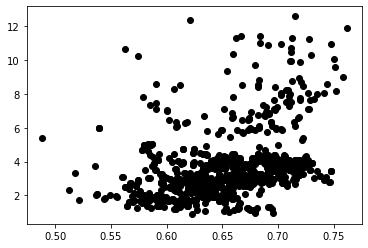

In [ ]:
plt.plot(
         (MSH_Amp_filt['MgO_Amp']/40.3044)/(MSH_Amp_filt['MgO_Amp']/40.3044+MSH_Amp_filt['FeOt_Amp']/71.844),
    MSH_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [ ]:
Amp_Chem=pt.calculate_amp_only_melt_comps(amp_comps=MSH_Amp_filt)

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:229: UserWarning: You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)
  w.warn('You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)')


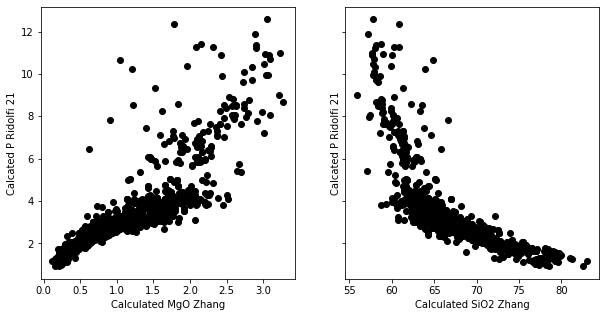

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(
         Amp_Chem['MgO_Eq9_Zhang17'],
    MSH_Amp_Press_NoFilter['P_kbar_calc'], 'ok')
ax1.set_xlabel('Calculated MgO Zhang')
ax1.set_ylabel('Calcated P Ridolfi 21')

ax2.set_xlabel('Calculated SiO2 Zhang')
ax2.set_ylabel('Calcated P Ridolfi 21')

ax2.plot(
         Amp_Chem['SiO2_Eq1_Zhang17'],
    MSH_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [ ]:
#None Filtered
MSH_Amp_Press_All=MSH_Amp_Press_NoFilter.copy()
MSH_Amp_Press_All['Preferred_P']=MSH_Amp_Press_All['P_kbar_calc']
MSH_Amp_Press_All['Model']="Ridolfi not filtered"
MSH_Amp_Press_All['Sample_ID_Amp']="MSH"

MSH_Amp_Press_Filt=MSH_Amp_Press_Filter.copy()
MSH_Amp_Press_Filt['Preferred_P']=MSH_Amp_Press_Filt['P_kbar_calc']
MSH_Amp_Press_Filt['Model']="Ridolfi filtered"
MSH_Amp_Press_Filt['Sample_ID_Amp']="MSH"

Combo_Amp=pd.concat([MSH_Amp_Press_All, MSH_Amp_Press_Filt], axis=0)

In [ ]:
Combo_Amp.to_pickle("Amp_MSH.pkl")

In [ ]:
MSH_Amp_Press_All['Sample_ID_Amp']

0      MSH
1      MSH
2      MSH
3      MSH
4      MSH
      ... 
988    MSH
989    MSH
990    MSH
991    MSH
992    MSH
Name: Sample_ID_Amp, Length: 993, dtype: object

In [ ]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2.5,4), sharey=True)
ax2 = ax1.twinx()

volc_order=['' 'MSH']
sns.violinplot(x="Sample_ID_Amp", y="Preferred_P",  cut=0, 
               linewidth=1,hue="Model", inner=None,
            data=Combo_Amp, split=True, ax=ax1, width=0.9, order=volc_order, stick=True
              , palette=['lightgreen', 'grey'])

# ax1.plot(-0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="MSH")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="MSH")],  
#          'xb')

# ax1.plot(0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="MSH")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="MSH")],  
#          'xr')

# ax1.plot(-0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="MSH")]),  
#          '*k', mfc='w', ms=20)

# ax1.plot(0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="MSH")]),  
#          '*k', mfc='w', ms=20)

ax1.plot(-0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="MSH")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="MSH")],  
         'x', mec='green')

ax1.plot(0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="MSH")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="MSH")],  
         'x', mec='k')

ax1.plot(-0.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="MSH")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="MSH")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('MSH_Amp.png', dpi=200)



In [ ]:
MSH_Amp_Press_Filter

In [ ]:
plt.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="MSH")]),  
         '*k', mfc='w', ms=20)

In [ ]:
Combo_Amp["Sample_ID_Amp"]

In [ ]:
Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="MSH")]